# MNIST

-----------------

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

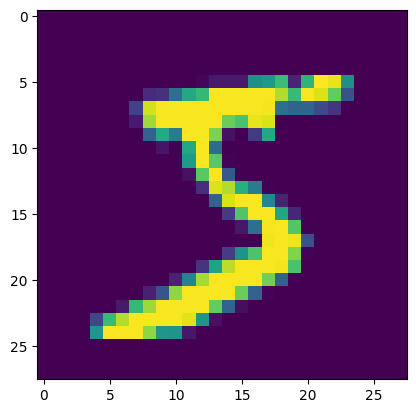

5


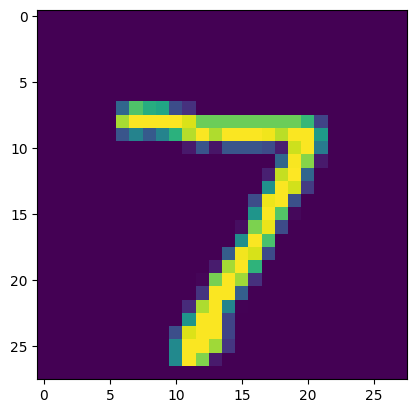

7


In [99]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(1):
    plt.imshow(x_train[i])
    plt.show()
    print(y_train[i])
    plt.imshow(x_test[i])
    plt.show()
    print(y_test[i])

In [100]:
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test = x_train.reshape(len(x_train), 28 * 28), x_test.reshape(len(x_test), 28 * 28)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [157]:
W1 = np.random.normal(size=(784, 10), scale=np.sqrt(2/784))
b1 = np.zeros(shape=10)
W2 = np.random.normal(size=(10, 10), scale=np.sqrt(2/10))
b2 = np.zeros(shape=10)

def relu(x, dir=False):
    if dir: return x > 0
    return np.maximum(x, 0)

def softmax(z):
    z = z - z.max(1, keepdims=True)
    e = np.exp(z)
    return e / e.sum(1, keepdims=True)

def one_hot_encode(y):
    y_hot = np.zeros(shape=(len(y), 10))
    for i in range(len(y)):
        y_hot[i][y[i]] = 1
    return y_hot

def loss_function(predictions, true):
    return predictions - true

def predict(x):
    Z1 = x.dot(W1) + b1
    A1 = relu(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def get_accuracy(predictions, Y):
    guesses = predictions.argmax(axis=1)
    average = 0
    i = 0
    while i < len(guesses):
        if guesses[i] == Y[i]:
            average += 1
        i += 1
    percent = (average / len(guesses)) * 100
    return percent
    

def train(data, labels, epochs=200, learning_rate=0.25):
    for i in range(epochs):
        labels_one_hot = one_hot_encode(labels)
        # Forward and backwards pass:
        m = data.shape[0]
        Z1, A1, Z2, A2 = predict(data)
        
        dZ2 = A2 - labels_one_hot
        
        dW2 = A1.T.dot(dZ2) / m
        db2 = dZ2.sum(0) / m
        
        dZ1 = (dZ2.dot(W2.T)) * (Z1 > 0)  # (m,10)
        
        dW1 = data.T.dot(dZ1) / m      # (784,10)
        db1 = dZ1.sum(0) / m           # (10,)
        # Update parameters:
        update(learning_rate, dW1, db1, dW2, db2)

        if i % 1 == 0:
            print("Iteration: ", i + 1)
            predictions = predict(data)[-1]
            print(
                round(get_accuracy(predictions, labels), 2)
            )

def update(learning_rate, dW1, db1, dW2, db2):
    global W1, b1, W2, b2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

In [158]:
y_train_hot, y_test_hot = one_hot_encode(y_train), one_hot_encode(y_test)
train(x_train, y_train)

Iteration:  1
21.74
Iteration:  2
30.17
Iteration:  3
39.67
Iteration:  4
47.11
Iteration:  5
43.65
Iteration:  6
44.25
Iteration:  7
36.5
Iteration:  8
51.54
Iteration:  9
55.49
Iteration:  10
63.77
Iteration:  11
66.53
Iteration:  12
70.49
Iteration:  13
72.43
Iteration:  14
73.88
Iteration:  15
75.35
Iteration:  16
75.52
Iteration:  17
77.13
Iteration:  18
76.84
Iteration:  19
78.7
Iteration:  20
78.21
Iteration:  21
79.78
Iteration:  22
79.31
Iteration:  23
80.57
Iteration:  24
79.99
Iteration:  25
81.01
Iteration:  26
80.42
Iteration:  27
81.43
Iteration:  28
80.85
Iteration:  29
81.82
Iteration:  30
81.37
Iteration:  31
82.23
Iteration:  32
82.04
Iteration:  33
82.81
Iteration:  34
82.92
Iteration:  35
83.48
Iteration:  36
83.69
Iteration:  37
84.17
Iteration:  38
84.5
Iteration:  39
84.8
Iteration:  40
85.11
Iteration:  41
85.43
Iteration:  42
85.64
Iteration:  43
85.84
Iteration:  44
86.11
Iteration:  45
86.19
Iteration:  46
86.42
Iteration:  47
86.44
Iteration:  48
86.69
Itera

In [159]:
predictions = predict(x_test)[-1]
print(get_accuracy(predictions, y_test))

91.16
